<a href="https://colab.research.google.com/github/jblanco89/ML-Zoomcamp-course/blob/main/ML_Zoomcamp_homework_w4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation
## ML Zoomcamp

### Homework Module 4

*Author:* Javier Blanco


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold

## Dataset

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-08 18:35:53--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.7’

data.csv.7          100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2023-10-08 18:35:53 (21.6 MB/s) - ‘data.csv.7’ saved [1475504/1475504]



## Data Preparation

target: `MSRP`

Features:
* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

In [3]:
car_price_raw = pd.read_csv('data.csv', sep=',')
car_price_df = car_price_raw[['Make','Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]
car_price_df.columns = car_price_df.columns.str.replace(' ', '_').str.lower()
# car_price_df = car_price_df.rename(columns={'msrp':'price'})
car_price_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
car_price_df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [5]:
car_price_df['engine_hp'] = car_price_df['engine_hp'].fillna(car_price_df['engine_hp'].mean())

<ipython-input-5-81e63a5836d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_price_df['engine_hp'] = car_price_df['engine_hp'].fillna(car_price_df['engine_hp'].mean())


In [6]:
car_price_df.isna().sum()

make                  0
model                 0
year                  0
engine_hp             0
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
car_price_df = car_price_df.dropna(axis=0)

In [8]:
car_price_df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [9]:
car_price_mean = car_price_df['msrp'].mean()
car_price_df['above_average'] = [1 if car_price > car_price_mean else 0 for car_price in car_price_df['msrp']]
car_price_df.head()

<ipython-input-9-3e8e5e2fe548>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_price_df['above_average'] = [1 if car_price > car_price_mean else 0 for car_price in car_price_df['msrp']]


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [10]:
car_price_df.columns = car_price_df.columns.str.lower().str.replace(' ', '_')

string_columns = list(car_price_df.dtypes[car_price_df.dtypes == 'object'].index)

for col in string_columns:
    car_price_df[col] = car_price_df[col].str.lower().str.replace(' ', '_')

<ipython-input-10-7651e4bd92f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_price_df[col] = car_price_df[col].str.lower().str.replace(' ', '_')


In [11]:
car_price_df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int64
dtype: object

In [12]:
numerical = car_price_df[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']]
categorical = car_price_df[['make', 'model', 'transmission_type', 'vehicle_style']]

In [13]:
X = car_price_df.drop(columns=['msrp', 'above_average'])
y = car_price_df['above_average']
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,
                                                 random_state=1,
                                                 shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=0.25,
                                                 random_state=1,
                                                 shuffle=True)

### Question 1 ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`


In [14]:
X_auc = X_train[numerical.columns]
for n in numerical.columns:
  fpr, tpr, thresholds = roc_curve(y_train, X_auc[n])
  auc_value = auc(fpr, tpr)
  print(n, round(auc_value,3))

year 0.697
engine_hp 0.923
engine_cylinders 0.765
highway_mpg 0.37
city_mpg 0.331


R. `engine_hp `

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979



In [15]:
train_dict = X_train.to_dict(orient='records')
train_dict[0]
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train
model = LogisticRegression(solver='liblinear',
                           C=1.0,
                           random_state=42,
                           max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [16]:
val_dict = X_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
y_pred_proba = model.predict_proba(X_val)
y_pred_proba = y_pred_proba[:,1]
len(y_pred_proba)

2377

In [18]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc_value = auc(fpr, tpr)
round(auc_value,3)

0.983

R. `0.979`

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

Threshold: 0.00, Precision: 0.27, Recall: 1.00
Threshold: 0.01, Precision: 0.47, Recall: 1.00
Threshold: 0.02, Precision: 0.52, Recall: 1.00
Threshold: 0.03, Precision: 0.55, Recall: 1.00
Threshold: 0.04, Precision: 0.57, Recall: 1.00
Threshold: 0.05, Precision: 0.59, Recall: 1.00
Threshold: 0.06, Precision: 0.60, Recall: 0.99
Threshold: 0.07, Precision: 0.61, Recall: 0.99
Threshold: 0.08, Precision: 0.63, Recall: 0.99
Threshold: 0.09, Precision: 0.65, Recall: 0.99
Threshold: 0.10, Precision: 0.66, Recall: 0.99
Threshold: 0.11, Precision: 0.67, Recall: 0.99
Threshold: 0.12, Precision: 0.68, Recall: 0.98
Threshold: 0.13, Precision: 0.69, Recall: 0.98
Threshold: 0.14, Precision: 0.70, Recall: 0.98
Threshold: 0.15, Precision: 0.70, Recall: 0.98
Threshold: 0.16, Precision: 0.71, Recall: 0.98
Threshold: 0.17, Precision: 0.72, Recall: 0.97
Threshold: 0.18, Precision: 0.73, Recall: 0.97
Threshold: 0.19, Precision: 0.74, Recall: 0.96
Threshold: 0.20, Precision: 0.75, Recall: 0.96
Threshold: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


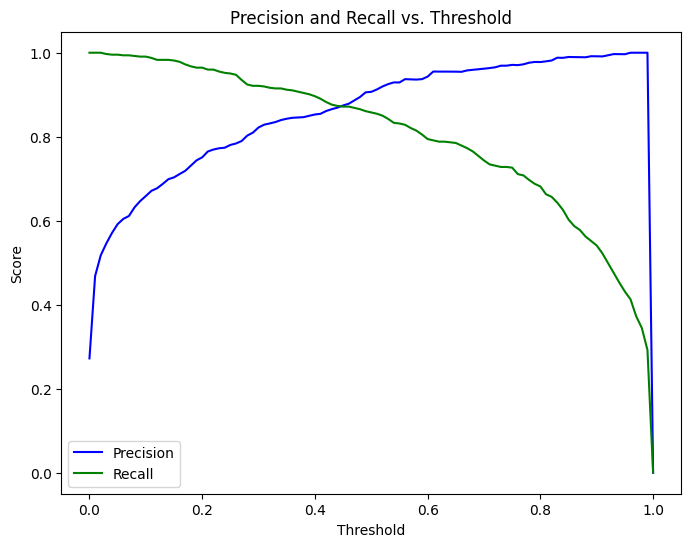

In [19]:
precision_scores = []
recall_scores = []
thresholds = np.arange(0.0, 1.01, 0.01)

for threshold in thresholds:
    y_pred_binary = np.array([1 if prob >= threshold else 0 for prob in y_pred_proba])
    # y_pred_binary = y_pred
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print(f'Threshold: {threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

# Plot precision and recall
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.show()

R. `0.48`

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [20]:
precision_scores = []
recall_scores = []
f1_scores = []
thresholds = np.arange(0.0, 1.01, 0.01)

for threshold in thresholds:
    y_pred_binary = np.array([1 if prob >= threshold else 0 for prob in y_pred_proba])
    # y_pred_binary = y_pred
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    f1 = 2 * (precision * recall) / (precision + recall)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    # print(f'Threshold: {threshold:.2f}, F-1: {f1:.2f}')

print(max(f1_scores))

0.8835341365461847


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-20-d1283326774b>:11: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


R. `0.72`

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

In [21]:
np.random.seed(1)
df_full_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)], axis=0)
df_full_target = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)], axis=0)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
auc_scores = []

for train_index, val_index in kf.split(df_full_train):
    X_train, X_val = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
    y_train, y_val = df_full_target.iloc[train_index], df_full_target.iloc[val_index]
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    y_val_pred_probs = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred_probs)
    auc_scores.append(auc)
print(auc_scores)
std_dev_auc = np.std(auc_scores)
print(f'Standard Deviation of AUC Scores: {std_dev_auc:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.982203691815362, 0.9747752699543581, 0.9862906576085628, 0.9774116363025774, 0.9821872299431906]
Standard Deviation of AUC Scores: 0.0040


R. `0.003`

### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.
